# SEC Filings - Exploratory Data Analysis (EDA) 

## Overview
- [Introduction](#Intro)
- Importing the Data:
    - [Importing the Data](#Importing)
- Visualization:
    - [Visualizing 8K](#8K)
        - [Detailed 8K](#8K2)
    - [Visualizing 10K](#10K)
        - [Detailed 10K](#10K2)
    - [Visualizing 10Q](#10Q)
        - [Detailed 10Q](#10Q2)

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a class="anchor" id="Intro"></a>

# Introduction:

Welcome! This notebook is programed to perform an Exploratory Data Analysis on any company in the list below.

### How it works:
- Choose a company's name from the options below.
- Type the company's name after `company_name` as it shows in the code snippet. (The gray box next to the company's name.) 
    - e.g.  'Apple' or "Apple"
- Click on the "Kernel" option in the Jupyter table of content above.
- Then, click "Restart and Run all"
- Scroll down and see the analysis!

---
**Company Options:**

- Apple, Inc. - `Apple`
- Facebook, Inc. -`Facebook`
- Google LLC - `Google`
- JPMorgan Chase & Co. - `JPMorgan`
- The Goldman Sachs Group, Inc. - `GoldmanSachs`
- Moody's Corporation - `Moodys`
- The International Business Machines Corporation (IBM) - `IBM`
- Twitter Inc. - `Twitter`
- BlackRock, Inc. - `BlackRock`
- Microsoft Corporation - `Micrisoft`

-----

### Company's Name:

In [2]:
company_name = 'Apple'

<a class="anchor" id="Function"></a>

# Importing the Data

### Creating a Function to Read the Data:

In [3]:
def reader(company_name):
    """
    Imports a data frame containing the SEC and Stock data.
    
    Parameters
    ------------
    company_name : str or var
        Passes a string or variable with the company's name.
    
    """
    company_name = company_name
    
    # Importing the Stock data
    stock = pd.read_csv(f'../1_Predicting_Stock_Prices/data/{company_name}_Clean.csv')
    stock['Date'] = pd.to_datetime(stock.Date)
    stock.set_index('Date', inplace=True)
    
    # Importing the SEC data
    sec_filings = pd.read_csv(f'data/{company_name}_SEC_clean.csv')
    # Renaming the Date so it can match with stock data frame and converting it into time.
    sec_filings.rename({'date':'Date'}, axis=1, inplace=True)
    sec_filings['Date'] = pd.to_datetime(sec_filings.Date)
    sec_filings.set_index('Date', inplace=True)
    # Merging both the SEC and Stock data according to the date in the SEC data frame.
    data = pd.merge(stock, sec_filings, on='Date', how='inner')
    data.reset_index(level=0, inplace=True)
    return data

 <a class="anchor" id="Importing"></a>
## Importing the Data:
Importing the data using the `reader` function.

In [4]:
df = reader(company_name)

In [5]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,...,PX14A6G,S-3,S-3ASR,S-4,S-8,SC 13D,SC 13G,SC TO-I,SD,UPLOAD
0,1994-01-26,33.75,34.0,33.25,33.5,1480400.0,0.0,1.0,1.057482,1.065315,...,0,0,0,0,0,0,0,0,0,0
1,1994-01-26,33.75,34.0,33.25,33.5,1480400.0,0.0,1.0,1.057482,1.065315,...,0,0,0,0,0,0,0,0,0,0
2,1994-02-10,36.25,37.5,36.00,36.5,2696700.0,0.0,1.0,1.139548,1.178843,...,0,0,0,0,0,0,1,0,0,0


### Checking for Null Values:

In [6]:
df.isnull().sum().sum()

0

-------

# Visualizing the Data with SEC Filings

## Creating a Functions to Plot the Data:

In [7]:
import matplotlib.patches as mpatches

In [8]:
def plotter(dataframe, column_1,
              document_type = None,
              start_date = None,
              end_date = None,
              company_name=company_name):
    """
    Returns a plot; for each SEC filing, a horizontal bar will appear on the specific date.
    
    Parameters
    -----------
    dataframe : var
        Passes the variable assigned to a dataframe.
        
    column_1 : str
        Passes the column name as a string.
        
    document_type : str
        Passes the type of document filing as a string.
    
    start_date : str
        Passes the starting date formatted as YYYY-MM-DD
         
    end_date : str
        Passes the starting date formatted as YYYY-MM-DD
         
    company_name : str or var
        Passes the company's name as a string or variable
   
    """
    temp_df = dataframe.copy()
    # Conditions for the starting and ending dates.
    if start_date:
        temp_df = temp_df[temp_df['Date']>=start_date]
    if end_date:
        temp_df = temp_df[temp_df['Date']<=end_date]
    # Setting the Date as the Index
    temp_df.set_index('Date', inplace=True, drop=False)
    # Setting the plot size and a dark background.
    plt.figure(figsize=(16,8))
    sns.set_style("darkgrid")
    # Plotting the column
    temp_df[column_1].plot(lw=2.5)
    
    # For each file type, plots a horizontal line according to the date.
    if document_type:
        
        if document_type == '8-K':
            doc_8K = temp_df[temp_df['8-K']==1].index
            
            list_8K = []
    
            for document in doc_8K:
                list_8K.append(document)
    
            for file in list_8K:
                plt.axvline(file, ls='-', color = 'm')
#                 magenta = mpatches.Patch(color='m', label='8-K Filings')
#                 plt.legend(handles=[magenta])

        if document_type == '10-K':
    
            doc_10K = temp_df[temp_df['10-K']==1].index
            
            list_10K = [] 
        
            for document in doc_10K:
                list_10K.append(document)
    
            for file in list_10K:
                plt.axvline(file, ls='-', color = 'lightseagreen')
                plt.legend()
                
        if document_type == '10-Q':        
            doc_10Q = temp_df[temp_df['10-Q']==1].index
           
            list_10Q = []
            
            for document in doc_10Q:
                list_10Q.append(document)
        
            for file in list_10Q:
                plt.axvline(file, ls='-', color = 'teal')
                plt.legend()
    # Setting the tilte of the plot.
    plt.title(f'{company_name}:  {column_1} \n SEC File:  {document_type}\n'
                  f'{str(temp_df.Date.min())[:10]} - {str(temp_df.Date.max())[:10]}', fontsize=18)
    # Setting the X and Y labels.
    plt.ylabel('Price ($)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.tight_layout()
    plt.legend()


 <a class="anchor" id="8K"></a>
## Visualizing 8-K Filings with the Closing Price:

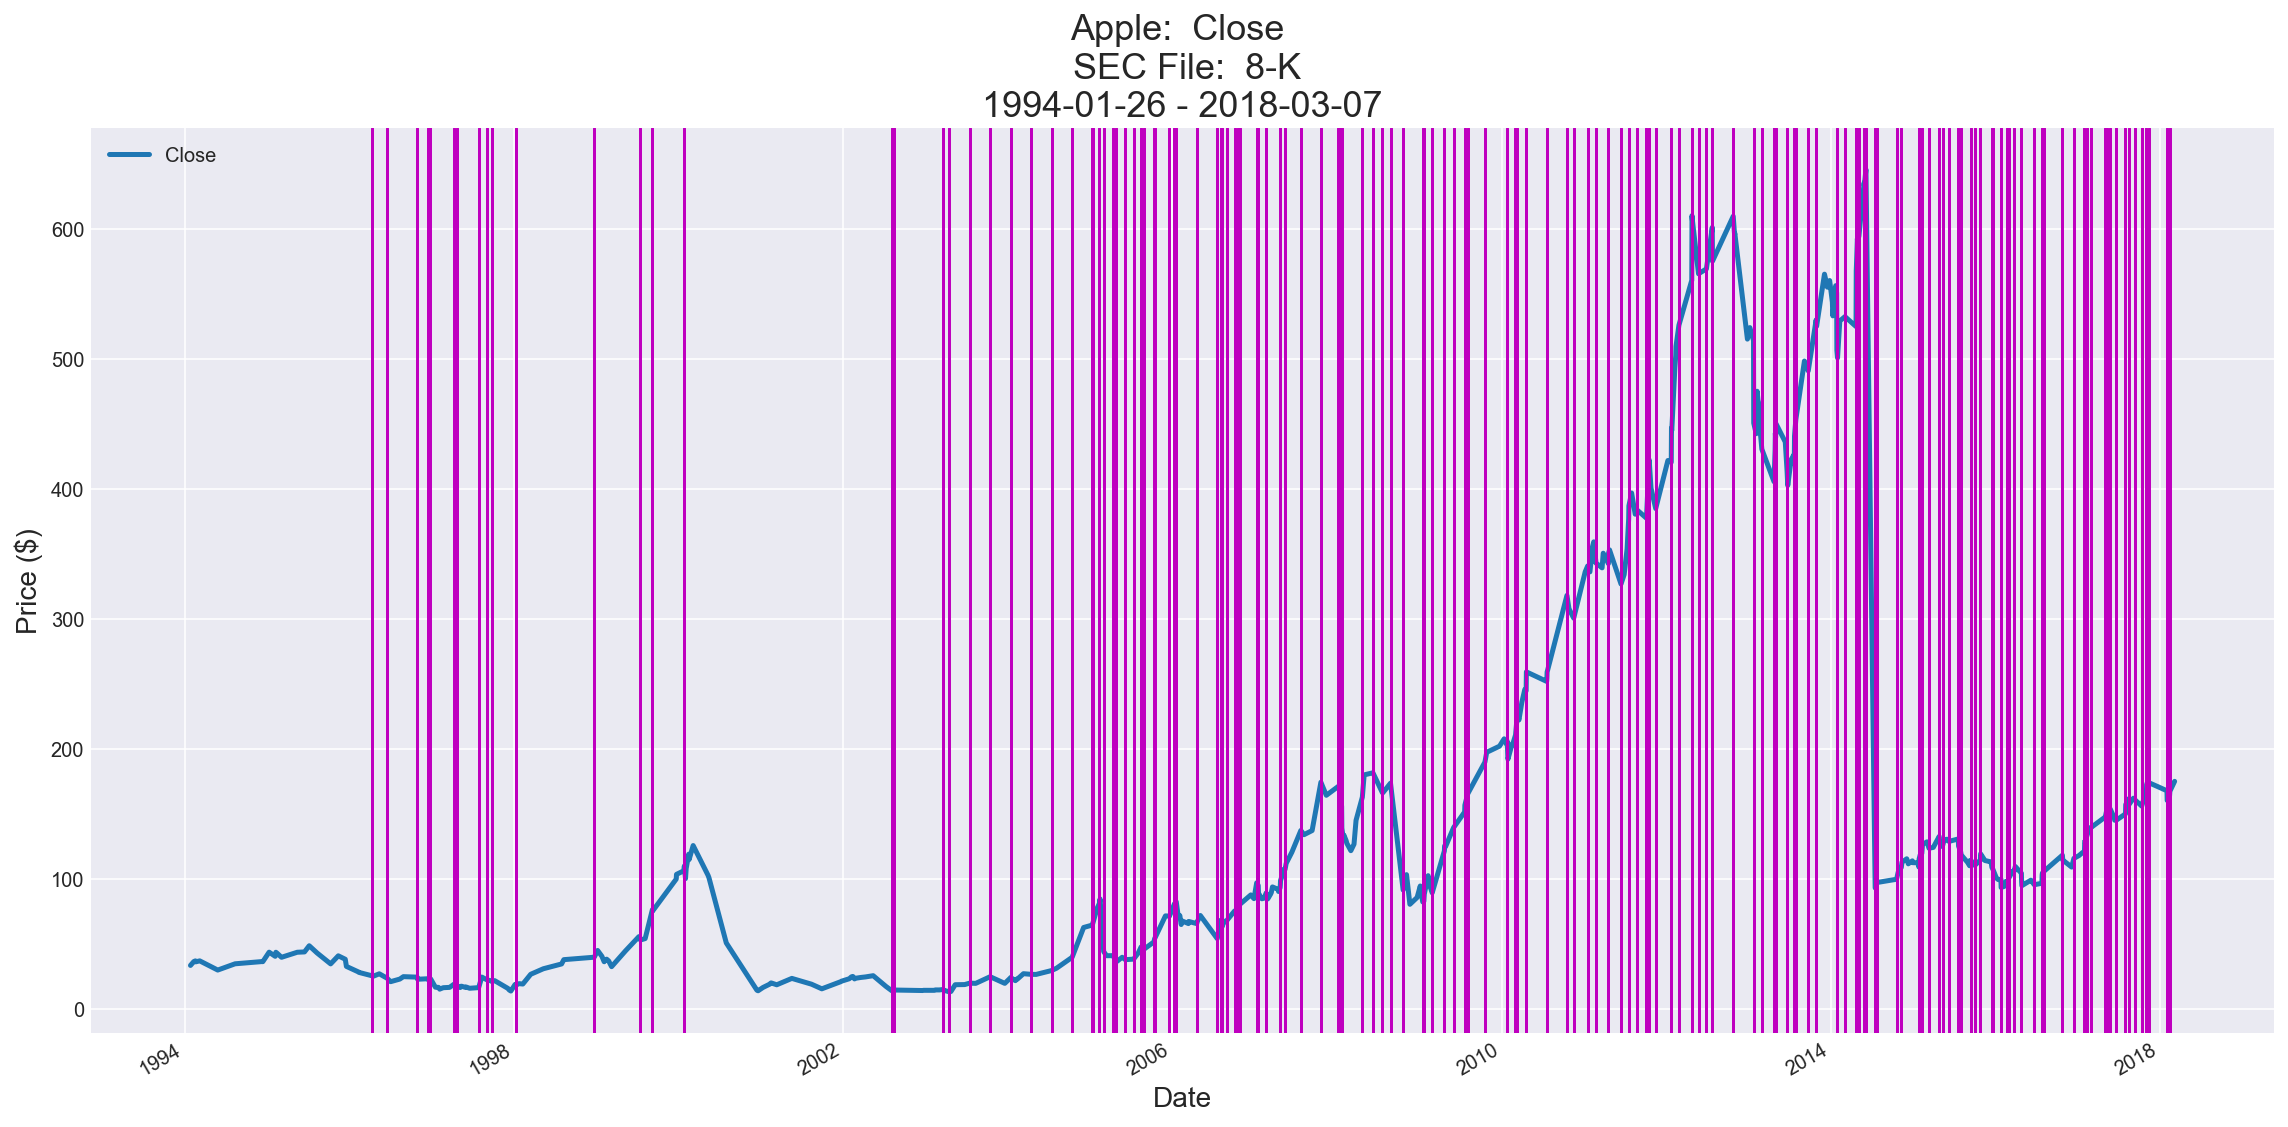

In [9]:
plotter(df, 'Close', '8-K')

 <a class="anchor" id="8K2"></a>
## Taking a Closer Look at the Last Three Years:

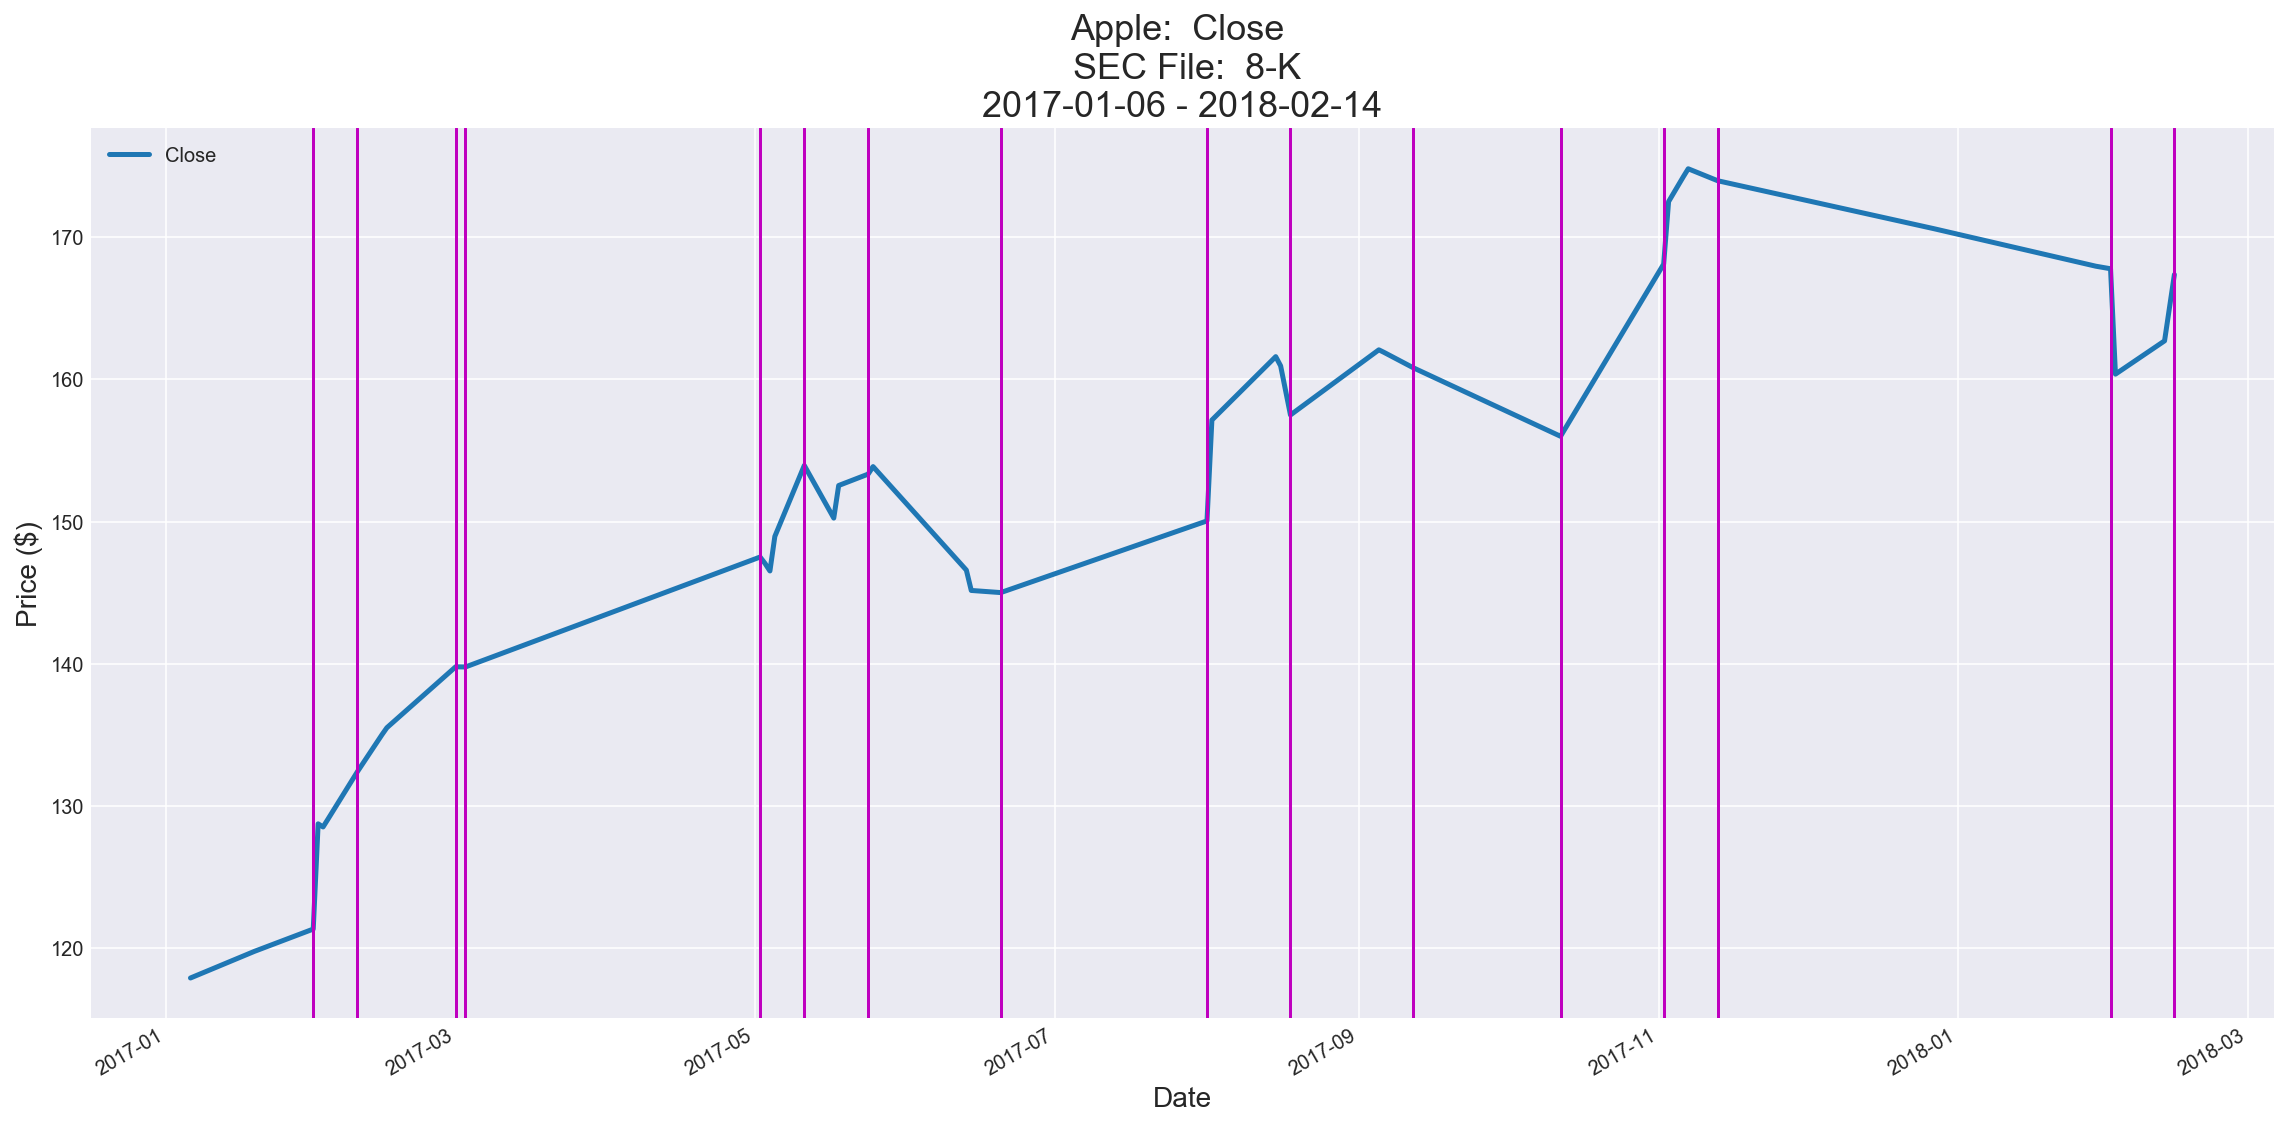

In [10]:
plotter(df, 'Close', '8-K', start_date='2017-01-01', end_date='2018-03-01')

------
 <a class="anchor" id="10K"></a>
## Visualizing 10-K Filings with the Closing Price:

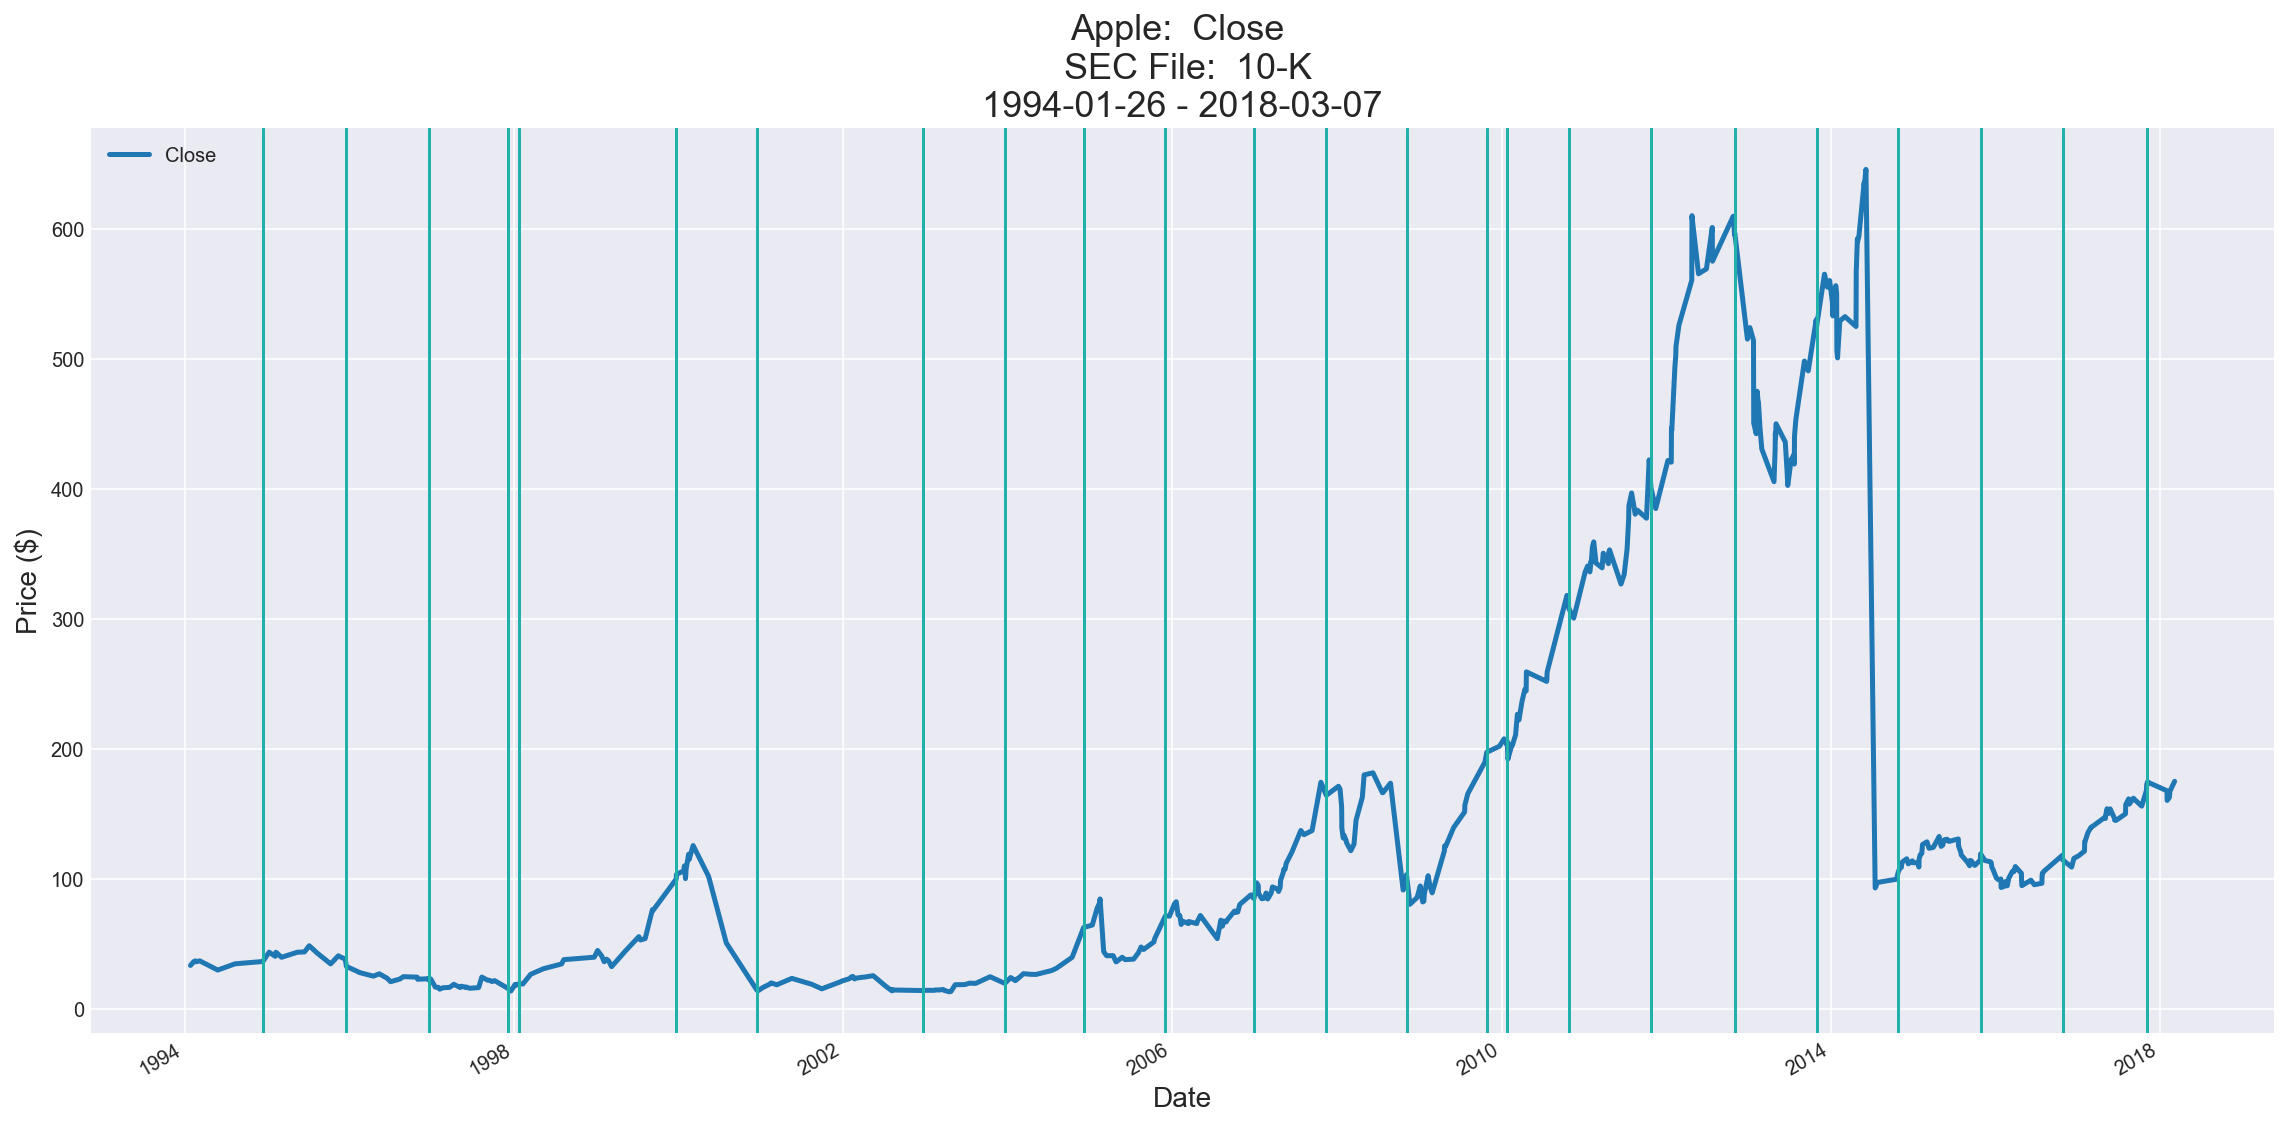

In [11]:
plotter(df, 'Close', '10-K')

 <a class="anchor" id="10K2"></a>
## Taking a Closer look at the last 3 Years:

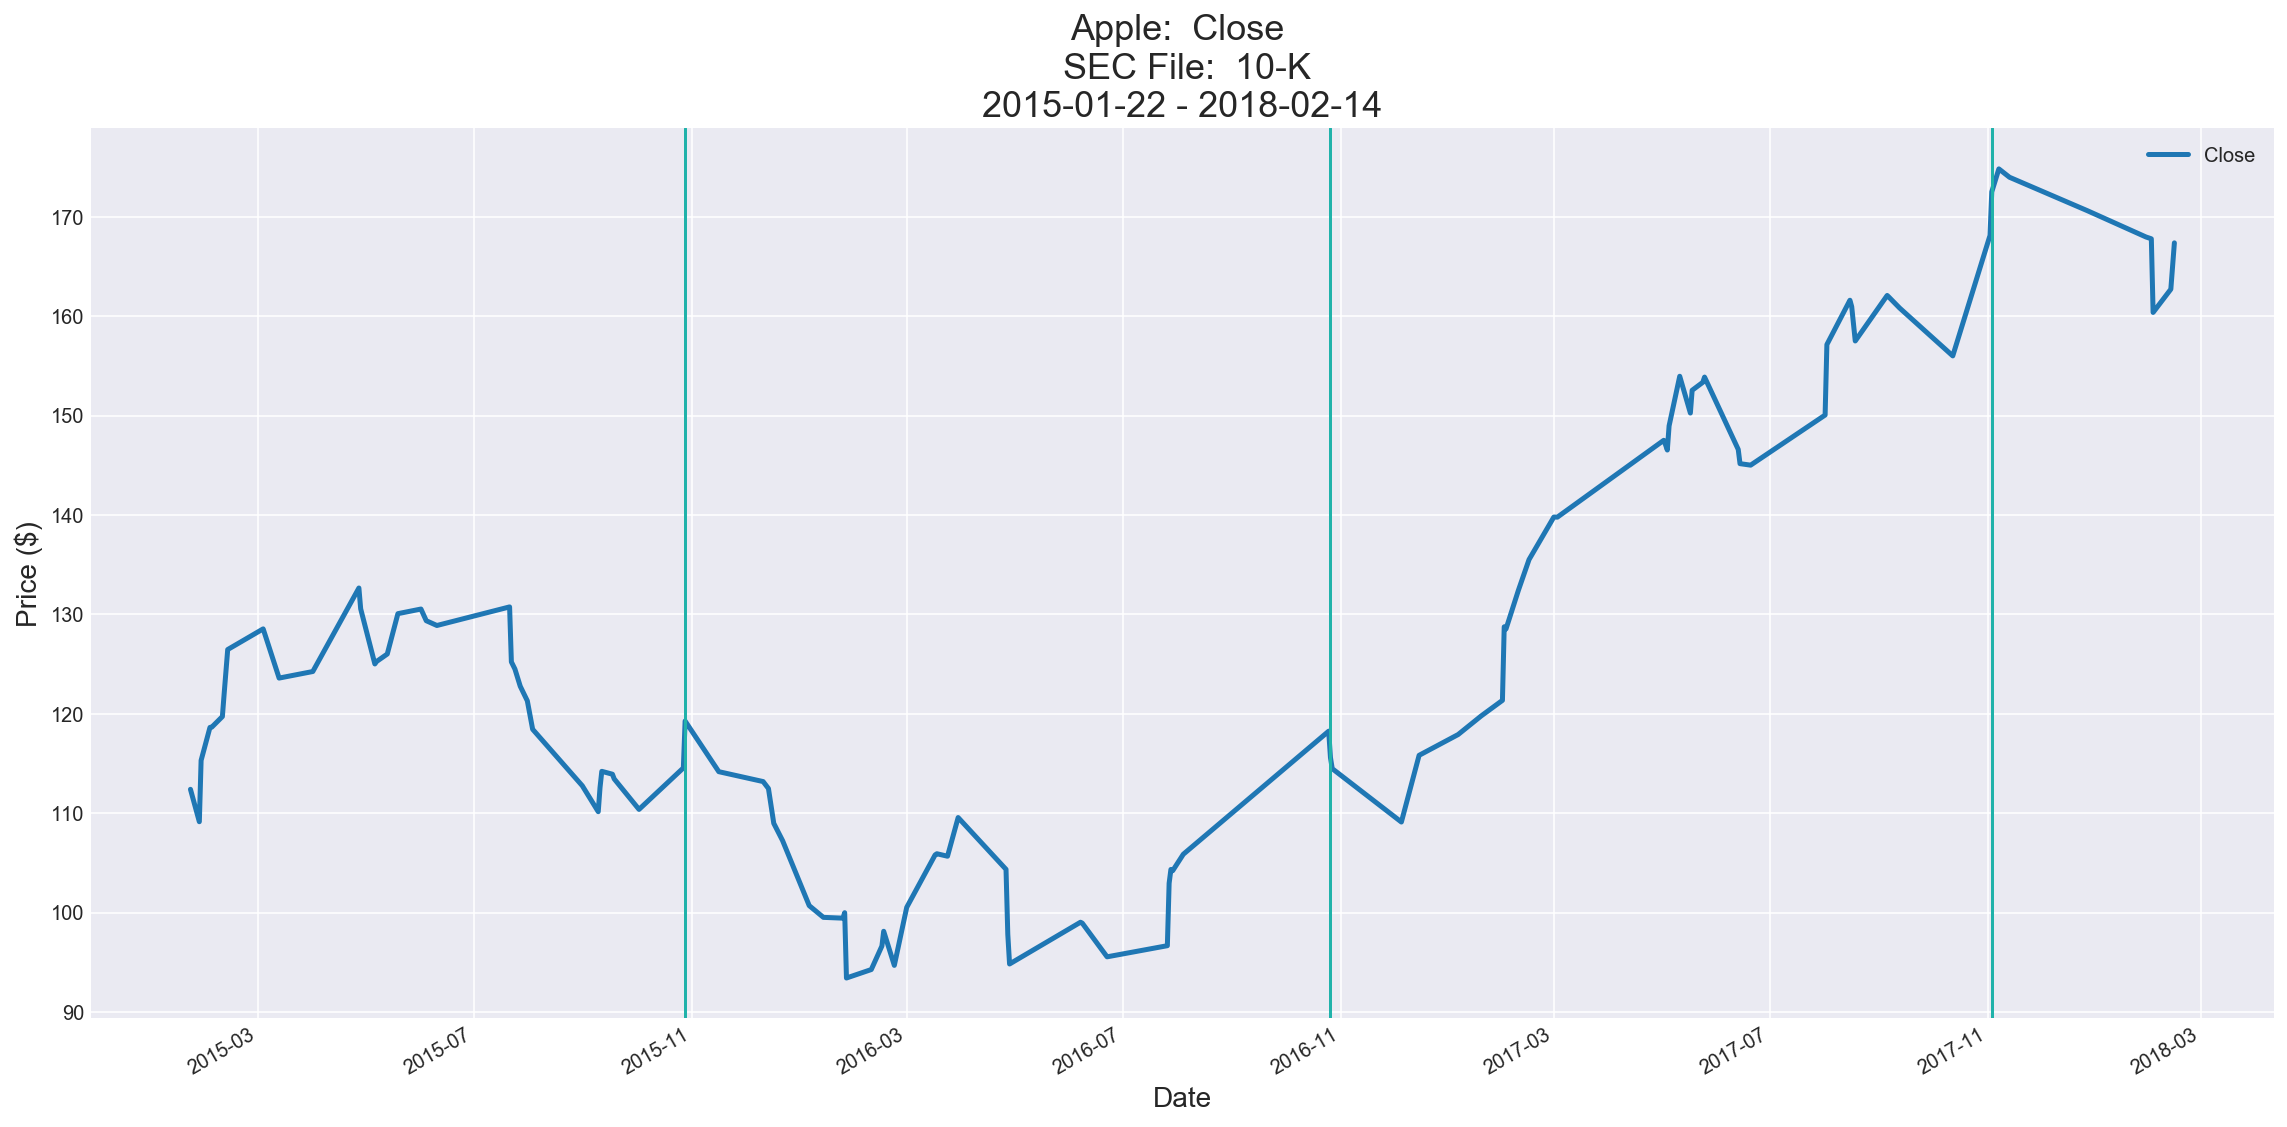

In [12]:
plotter(df, 'Close', '10-K', start_date='2015-01-01',end_date='2018-03-01')

------
 <a class="anchor" id="10Q"></a>
## Visualizing 10-Q Filings with the Closing Price:

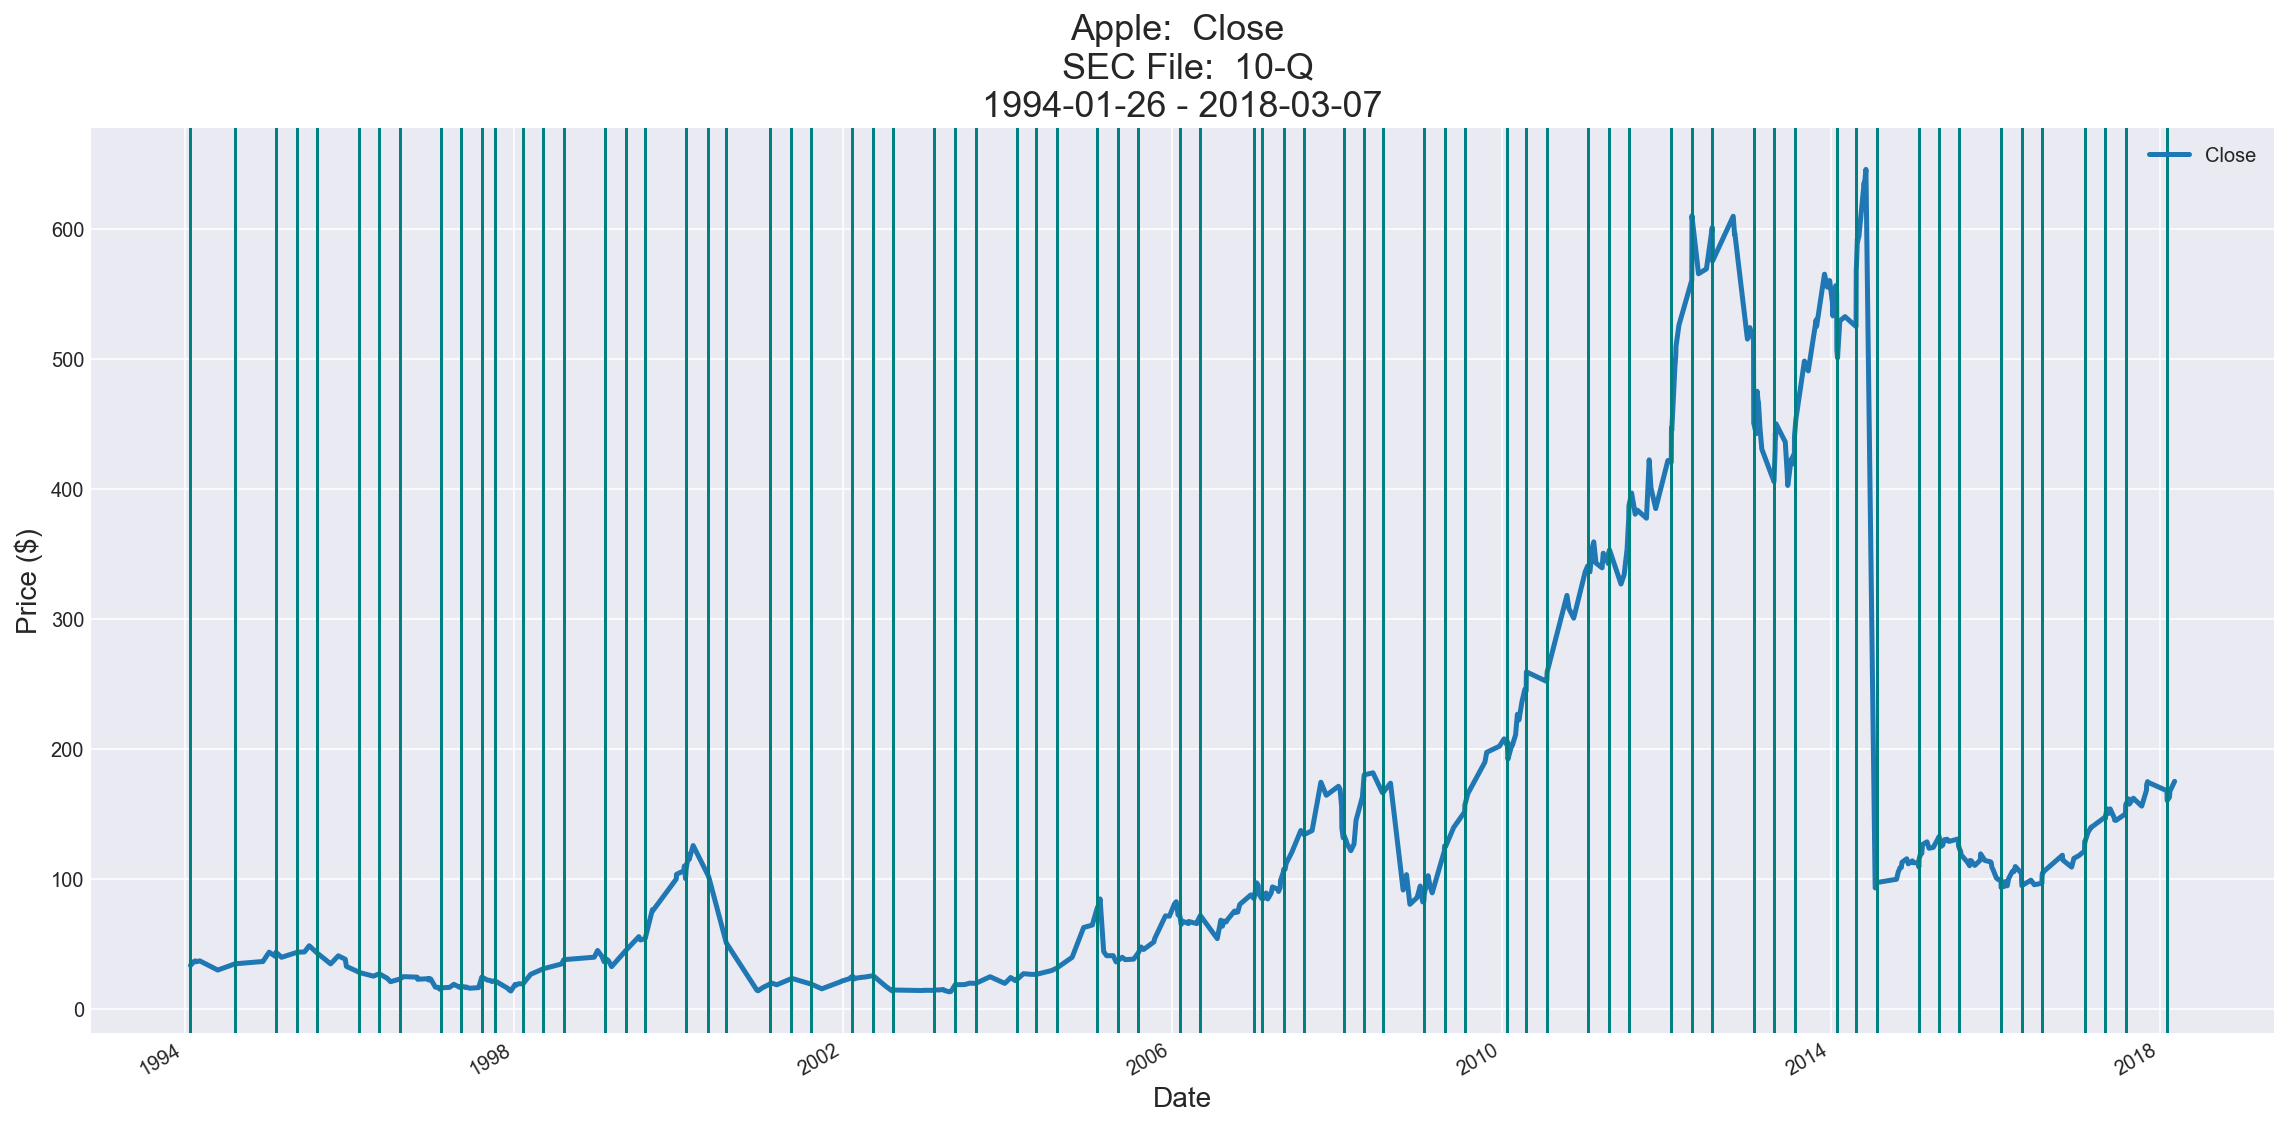

In [13]:
plotter(df, 'Close', '10-Q')

 <a class="anchor" id="10Q2"></a>
## Taking a Closer look at the last 3 Years:

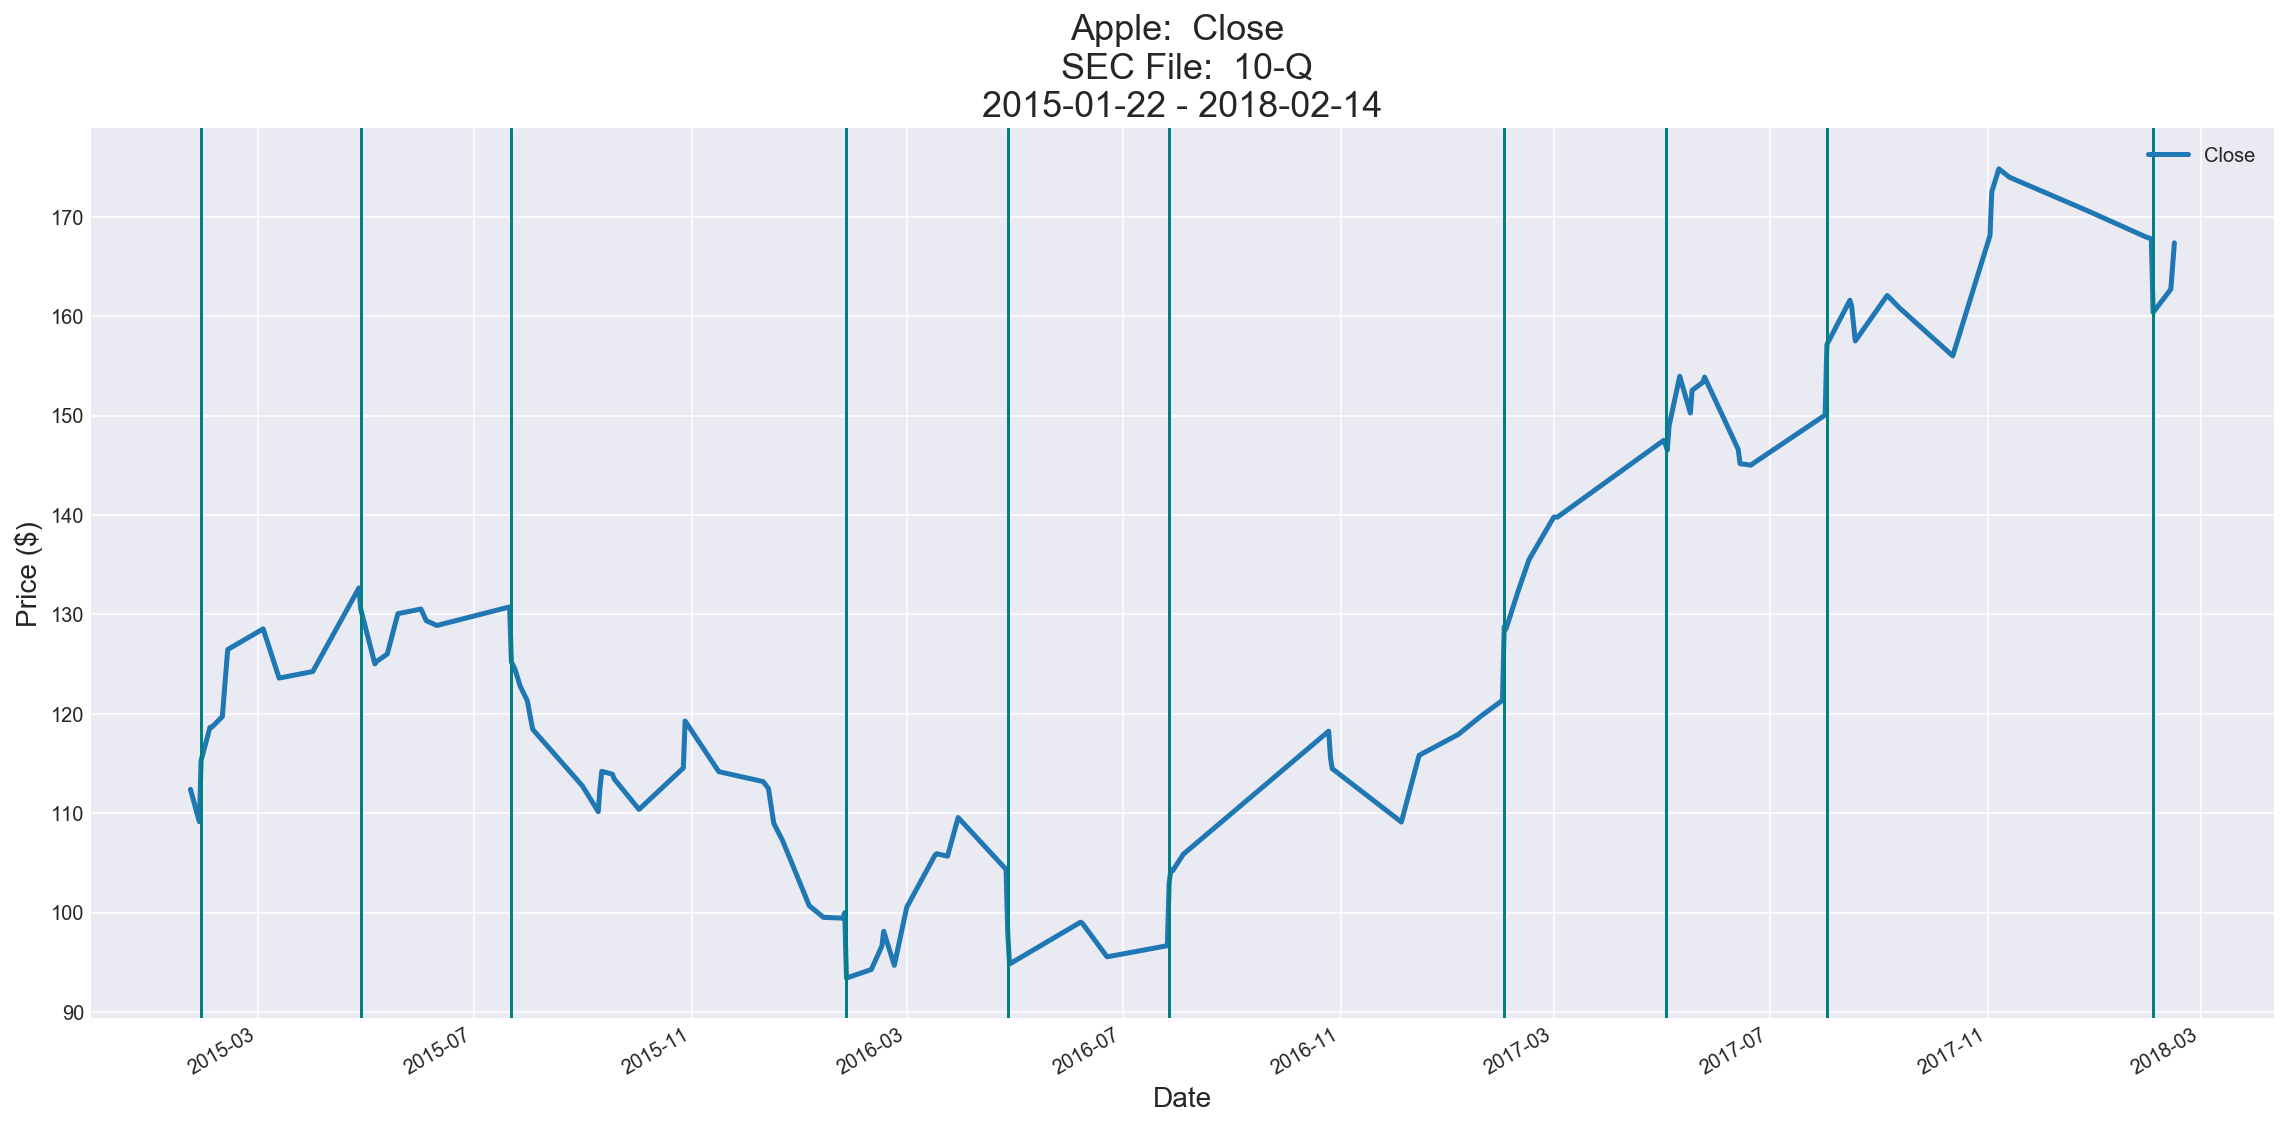

In [14]:
plotter(df, 'Close', '10-Q', start_date='2015-01-01',end_date='2018-03-01')

----

## Saving onto a CSV:

In [15]:
df.to_csv(f'data/{company_name}_wSEC.csv', index=False)